In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Extracting the zipfile
root_folder = r"C:\Users\91866\OneDrive\Desktop\ML practice models\Payment deliquency"
file_path = r"C:\Users\91866\OneDrive\Desktop\ML practice models\Payment deliquency\GiveMeSomeCredit.zip"
with zipfile.ZipFile(file_path,'r') as zip_file:
    zip_file.extractall(root_folder)

In [3]:
df = pd.read_csv(r'cs-training.csv') # Loading the CSV file

In [4]:
df.head() # Loading the first 5 observations

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # Deleting the unwanted (additional index) column from the dataset 

In [6]:
df.info() # Printing the basic information about the data

# There are 150k observation in the dataset and 11 columns which consist of one target variable and rest are
# independent variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

# Preprocessing:

In [7]:
# Checking for missing values

df.isnull().sum()/len(df)*100

# There are 29731 missing values in Monthly income feature and 3924 missing values in Number of dependent feature 

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [8]:
df.describe().T # Descriptive statistics about the datset

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [9]:
# The debt ratio and RevolvingUtilizationOfUnsecuredLines is in %. Hence, replacing all the above 100 values with 100
df['RevolvingUtilizationOfUnsecuredLines'] = np.where(df['RevolvingUtilizationOfUnsecuredLines']>100,
                                                      100,df['RevolvingUtilizationOfUnsecuredLines'])
df['DebtRatio'] = np.where(df['DebtRatio']>100,100,df['DebtRatio'])

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,0.476274,3.901435,0.0,0.029867,0.154181,0.559046,100.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,17.881230,37.151865,0.0,0.175074,0.366508,0.868254,100.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [11]:
# As we can see in above analysis most of the applicants for the Loan as 0 dependent person and the average (mean) 
# monthly income is 6670 and average (median) monthly income is 5400. Hence, we will replace it with the average(median)
# value for missing values
df['NumberOfDependents'].fillna(0,inplace=True)
df['MonthlyIncome'].fillna(5400,inplace=True)

In [12]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Exploratory data analysis

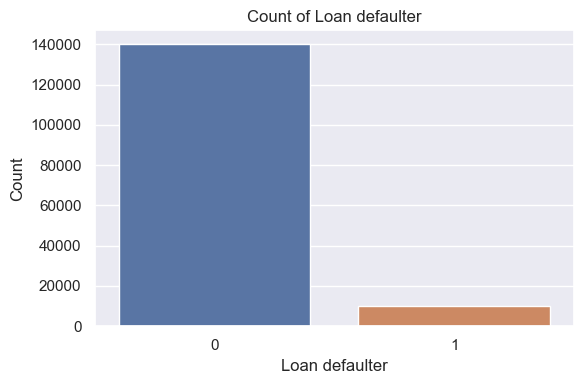

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='SeriousDlqin2yrs')
plt.xlabel('Loan defaulter')
plt.ylabel('Count')
plt.title('Count of Loan defaulter')
plt.tight_layout()
plt.show()

# There is a huge class imbalance in the dataset for target variable

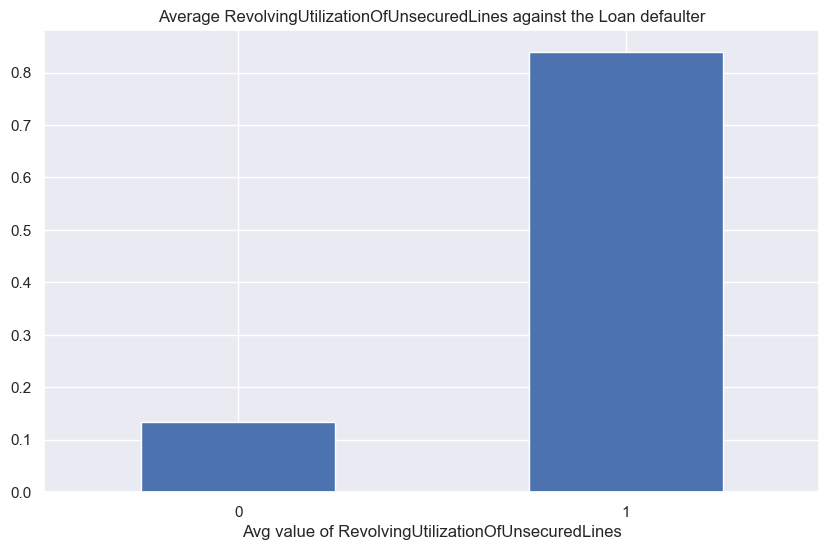

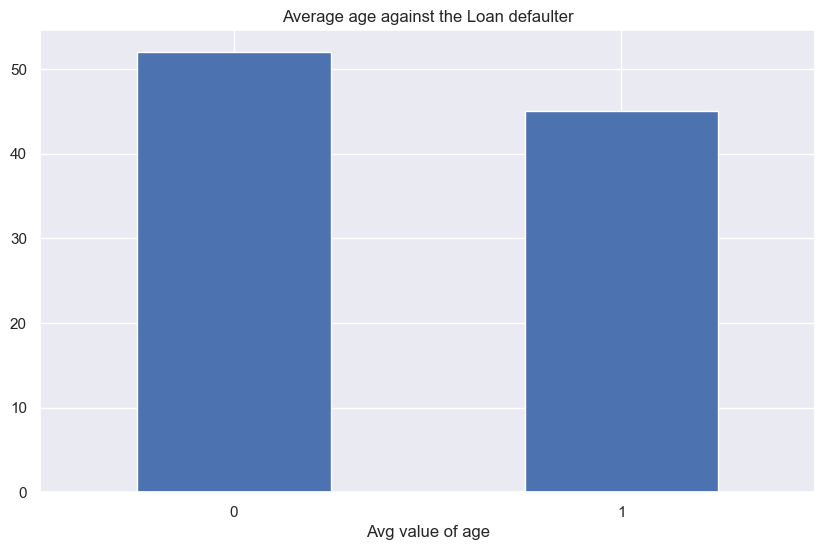

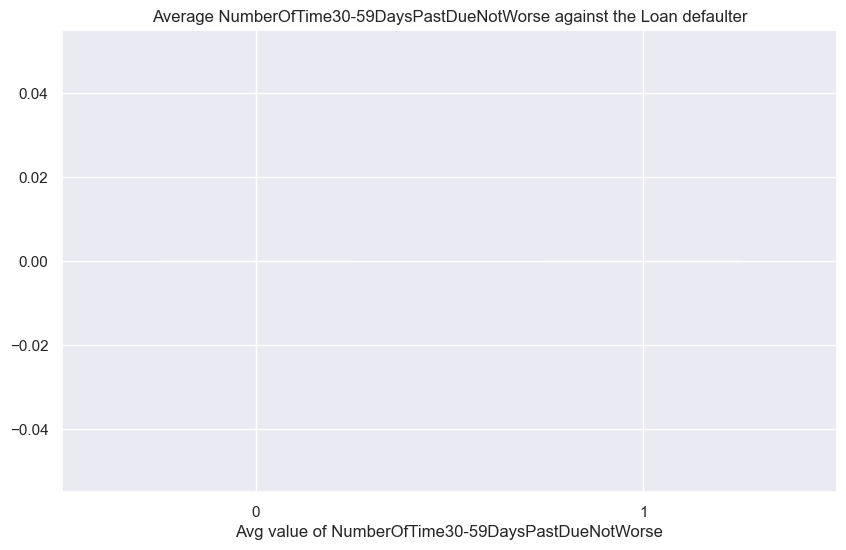

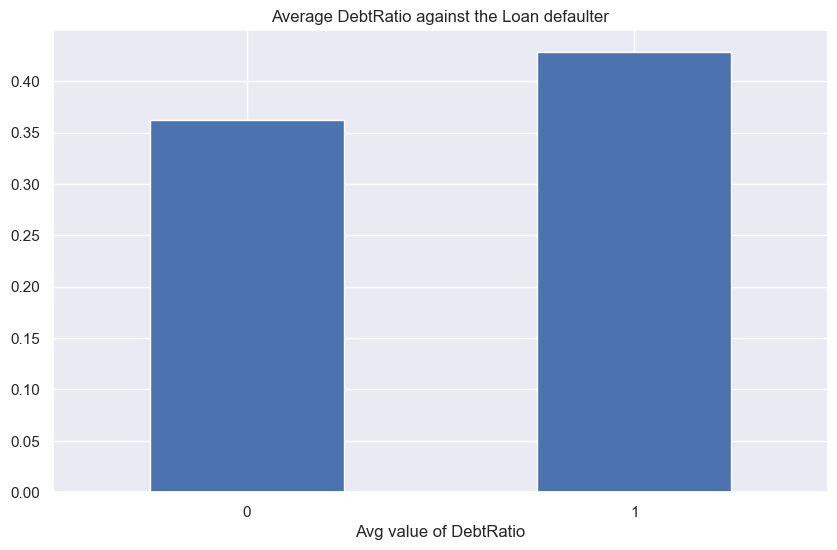

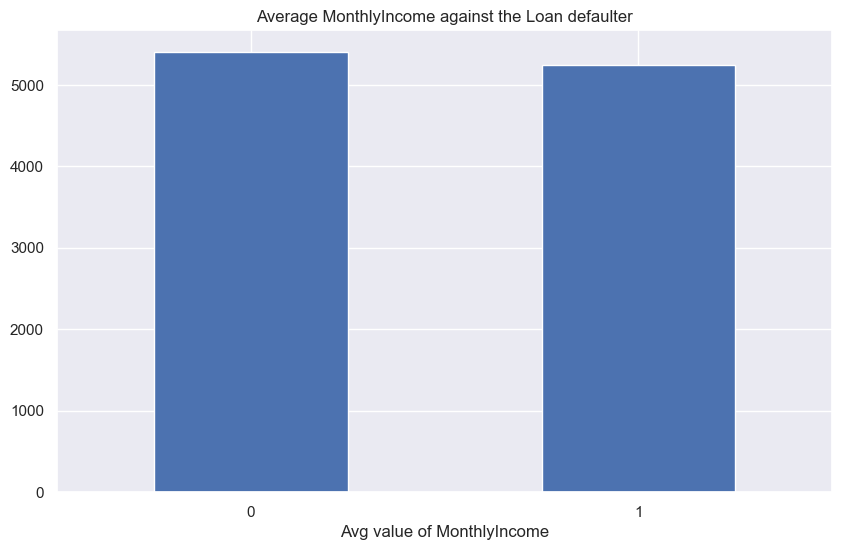

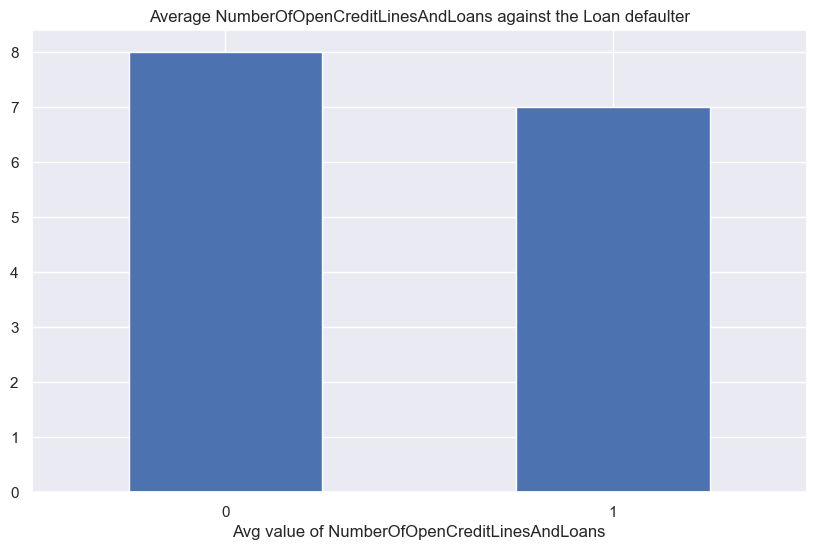

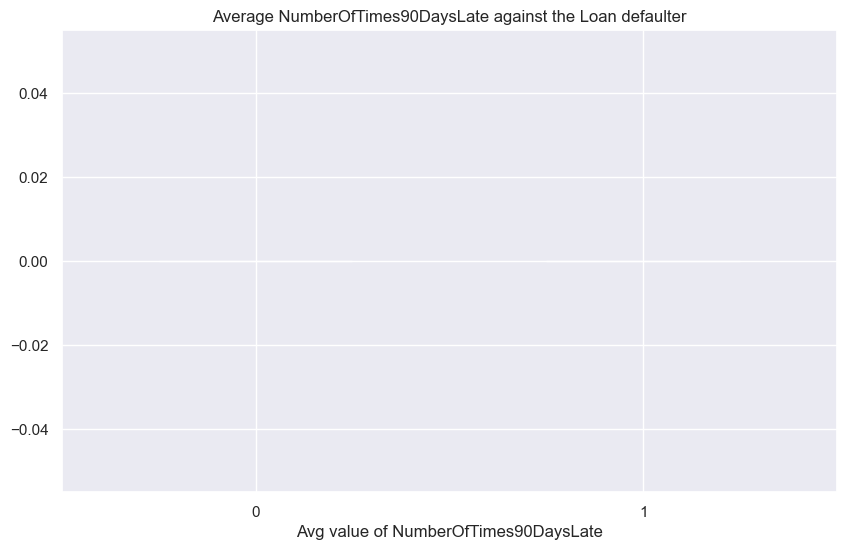

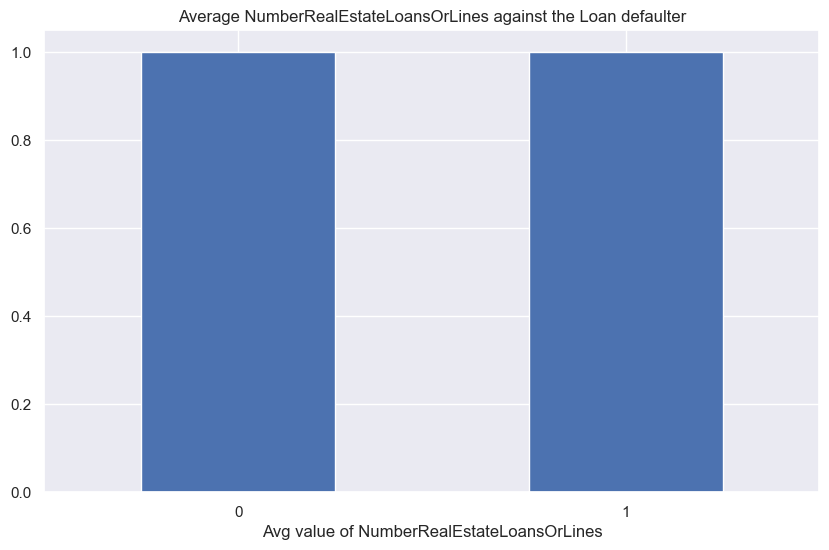

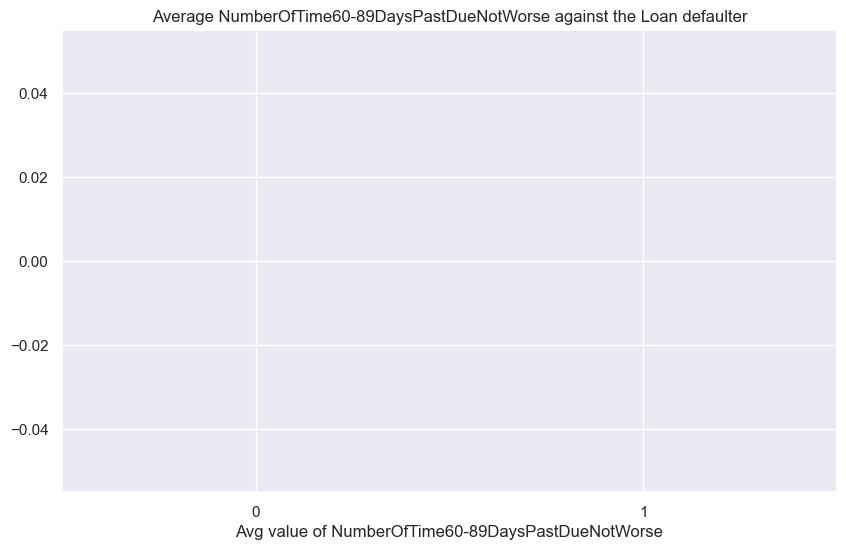

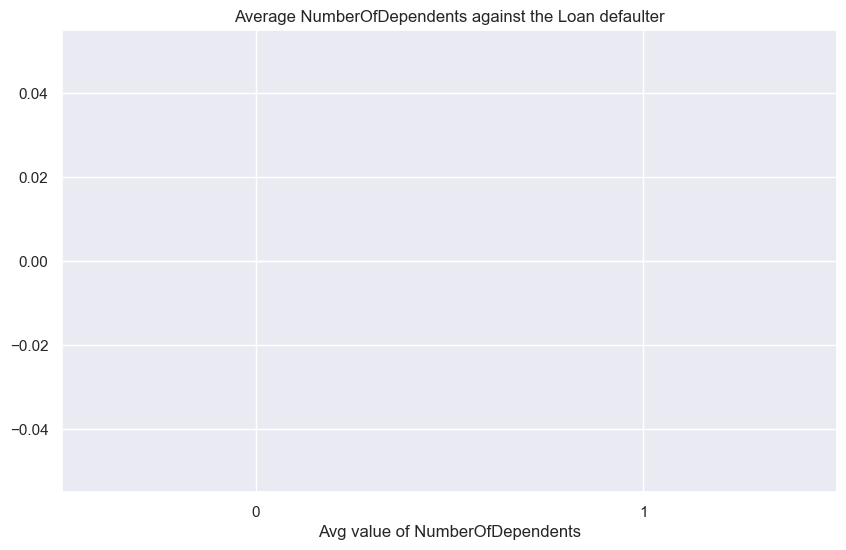

In [14]:
for col in df.columns[1:]:
    data = df.copy()
    data = data.groupby('SeriousDlqin2yrs')[col].median()
    data.plot(kind='bar',figsize=(10,6))
    plt.title(f'Average {col} against the Loan defaulter')
    plt.xlabel(f'Avg value of {col}')
    plt.xticks(rotation=0)
    plt.show()

In [15]:
# Unique values for each column

for col in df.columns[1:]:
    print(f'Unique values for {col} : {df[col].nunique()}')

Unique values for RevolvingUtilizationOfUnsecuredLines : 125508
Unique values for age : 86
Unique values for NumberOfTime30-59DaysPastDueNotWorse : 16
Unique values for DebtRatio : 108254
Unique values for MonthlyIncome : 13594
Unique values for NumberOfOpenCreditLinesAndLoans : 58
Unique values for NumberOfTimes90DaysLate : 19
Unique values for NumberRealEstateLoansOrLines : 28
Unique values for NumberOfTime60-89DaysPastDueNotWorse : 13
Unique values for NumberOfDependents : 13


ANOVA for RevolvingUtilizationOfUnsecuredLines: F-value: 414.62970065087376,p-value: 3.8891549888305663e-92


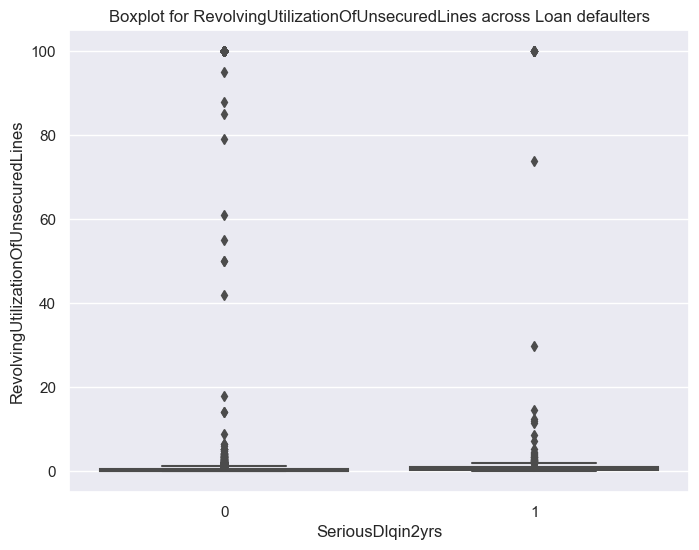

ANOVA for age: F-value: 3260104.8900155006,p-value: 0.0


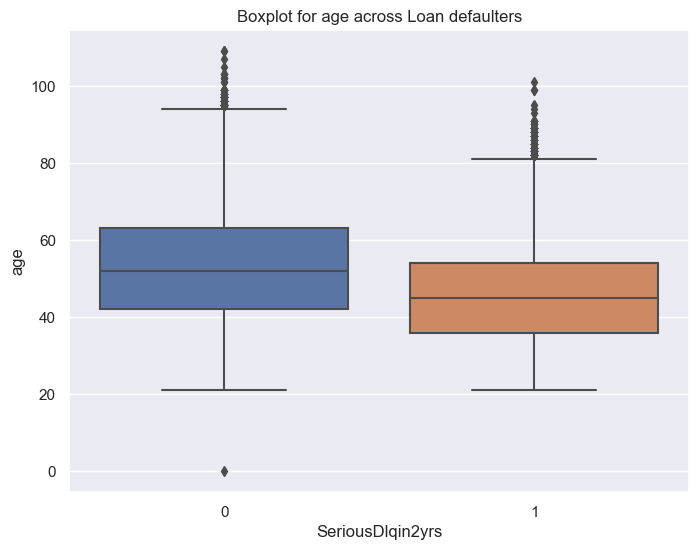

ANOVA for NumberOfTime30-59DaysPastDueNotWorse: F-value: 2608.961913456489,p-value: 0.0


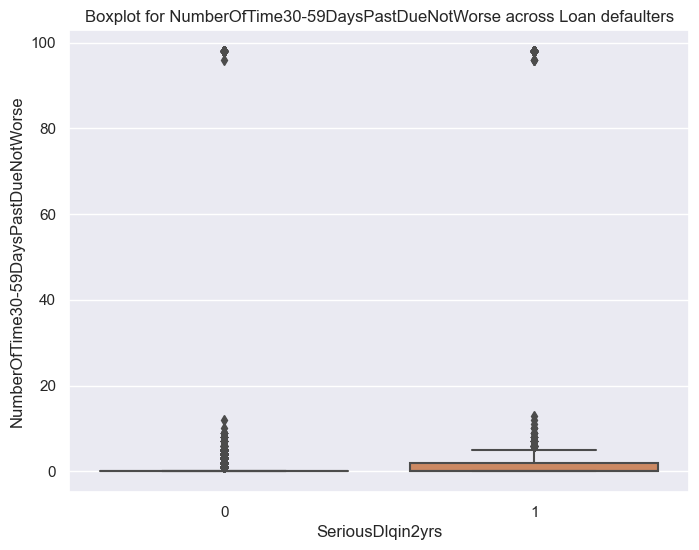

ANOVA for DebtRatio: F-value: 56217.97565164678,p-value: 0.0


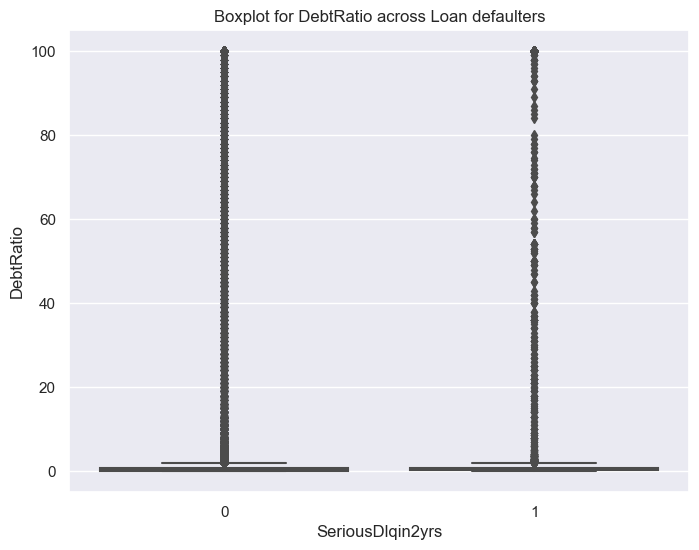

ANOVA for MonthlyIncome: F-value: 99890.03243718755,p-value: 0.0


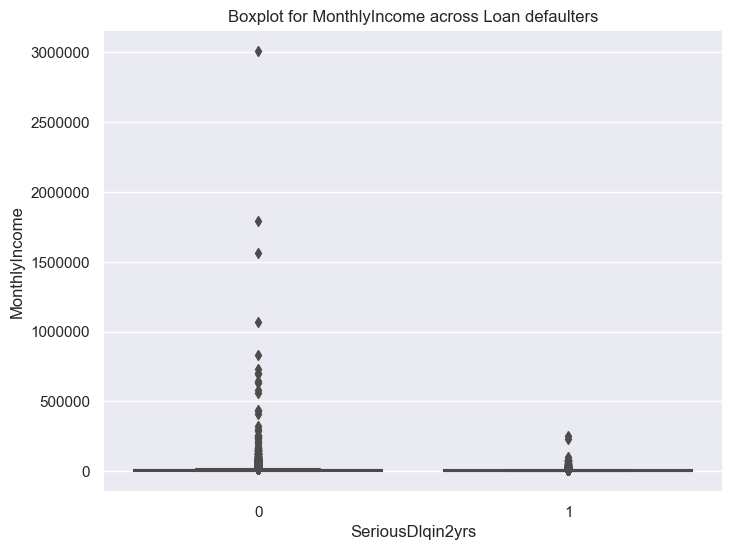

ANOVA for NumberOfOpenCreditLinesAndLoans: F-value: 565929.3583691483,p-value: 0.0


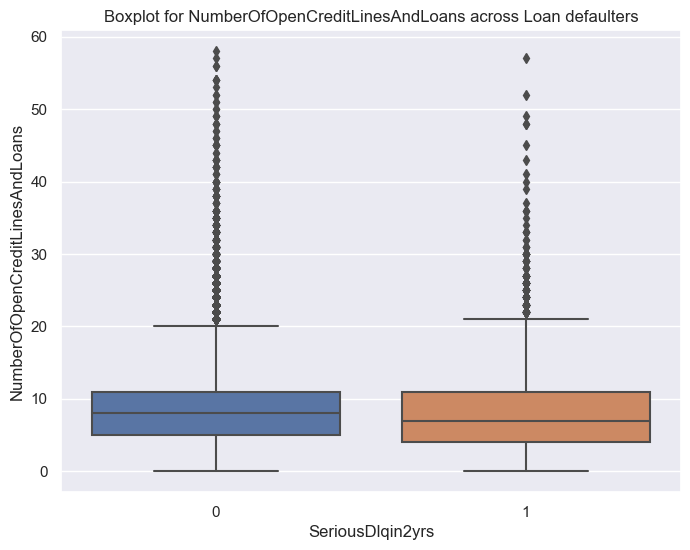

ANOVA for NumberOfTimes90DaysLate: F-value: 1501.2431656216793,p-value: 0.0


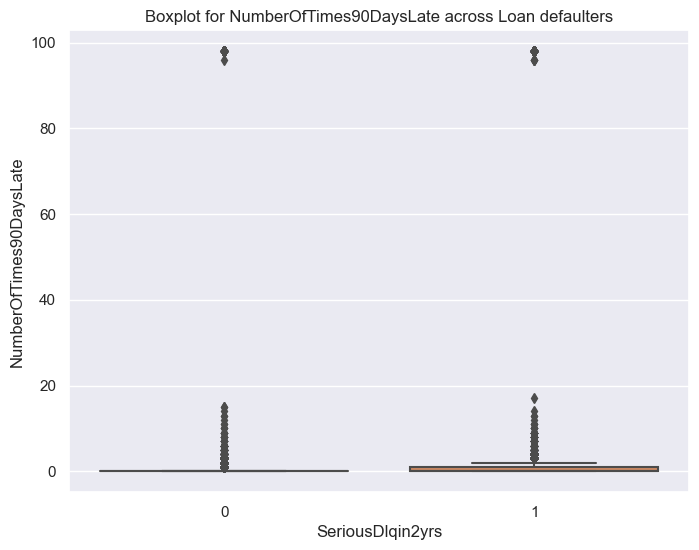

ANOVA for NumberRealEstateLoansOrLines: F-value: 38363.26679422421,p-value: 0.0


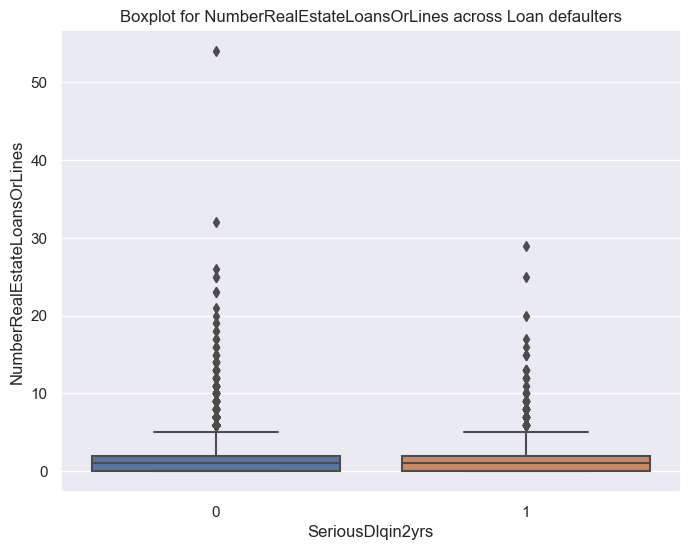

ANOVA for NumberOfTime60-89DaysPastDueNotWorse: F-value: 847.2864833618635,p-value: 3.898453369577042e-186


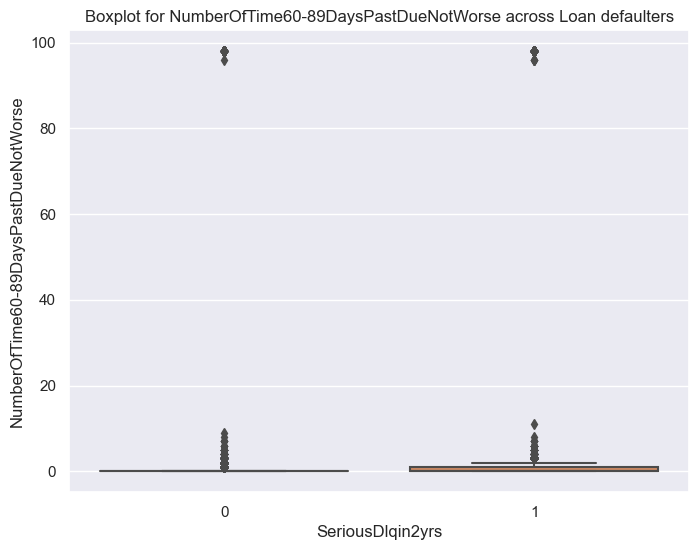

ANOVA for NumberOfDependents: F-value: 18783.19750587851,p-value: 0.0


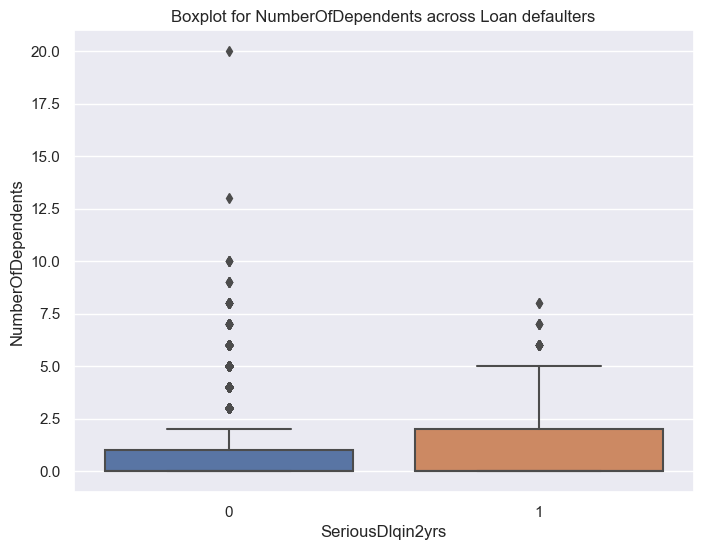

In [16]:
from scipy.stats import f_oneway
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()

for col in df.columns[1:]:
    data = df.copy()
    x_resampled, y_resampled = oversampler.fit_resample(df[[col]],df[['SeriousDlqin2yrs']])
    df_resampled = pd.concat([pd.DataFrame(x_resampled,columns=[col]),
                            pd.DataFrame(y_resampled,columns=['SeriousDlqin2yrs'])],axis=1)
    result = f_oneway(df_resampled[col],df_resampled['SeriousDlqin2yrs'])
    print(f'ANOVA for {col}: F-value: {result.statistic},p-value: {result.pvalue}')
    
    # Visualize the relationship using box-plots
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df,x='SeriousDlqin2yrs',y=col)
    plt.ticklabel_format(axis='y',style='plain')
    plt.title(f'Boxplot for {col} across Loan defaulters')
    plt.show()

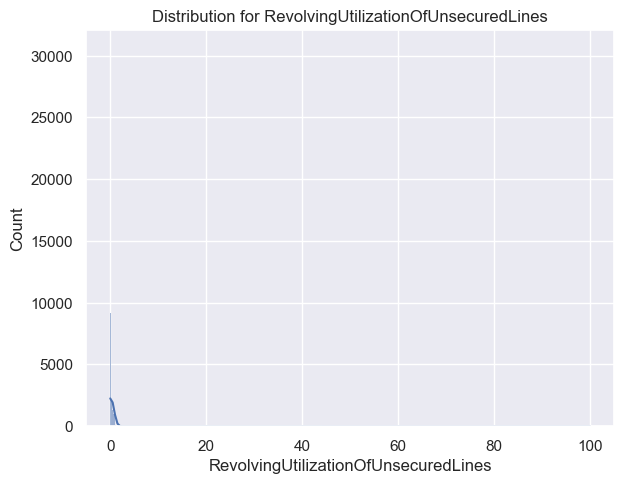

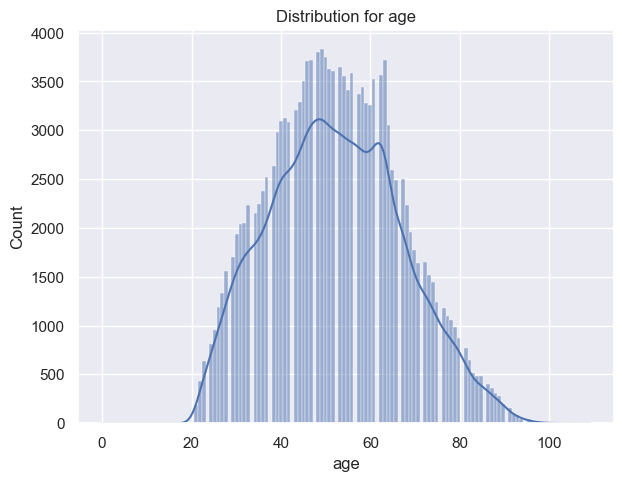

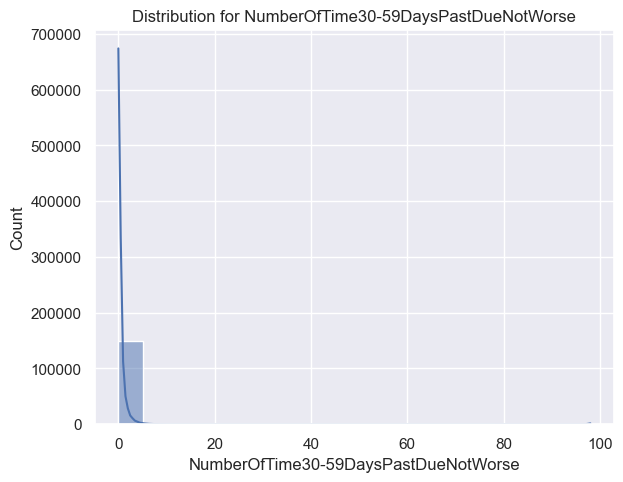

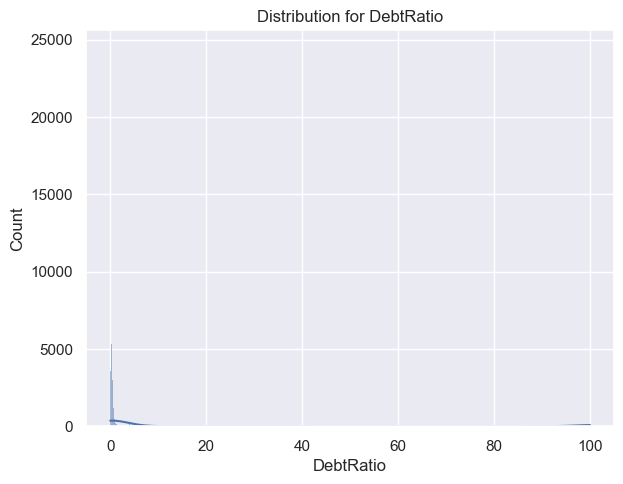

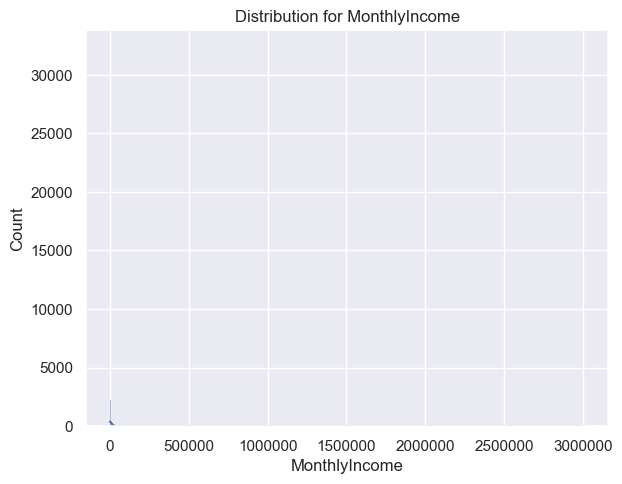

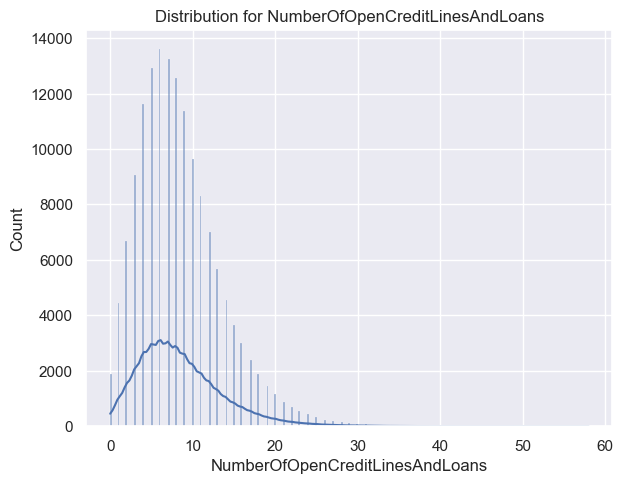

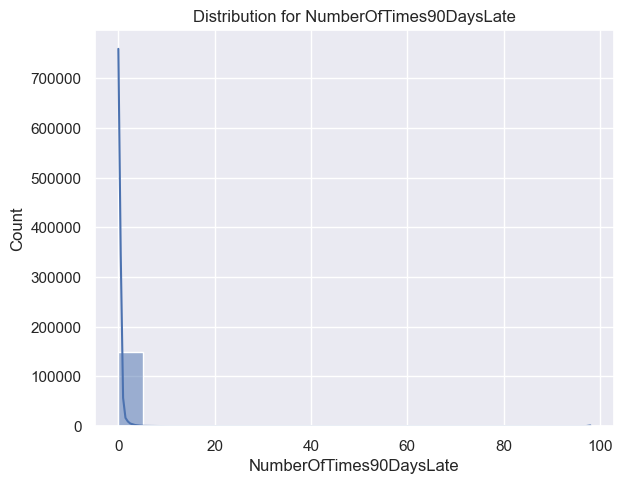

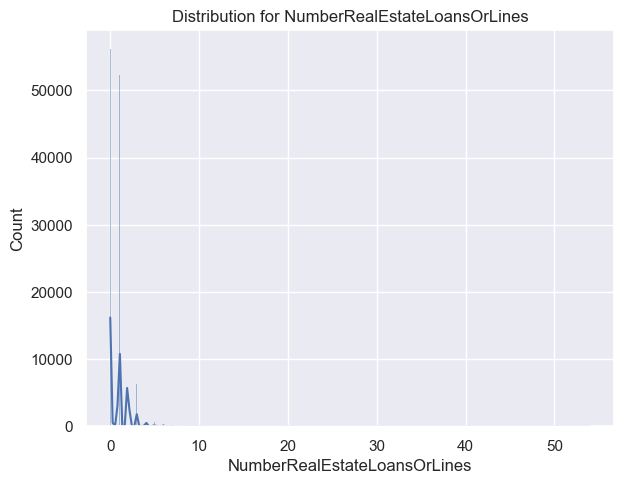

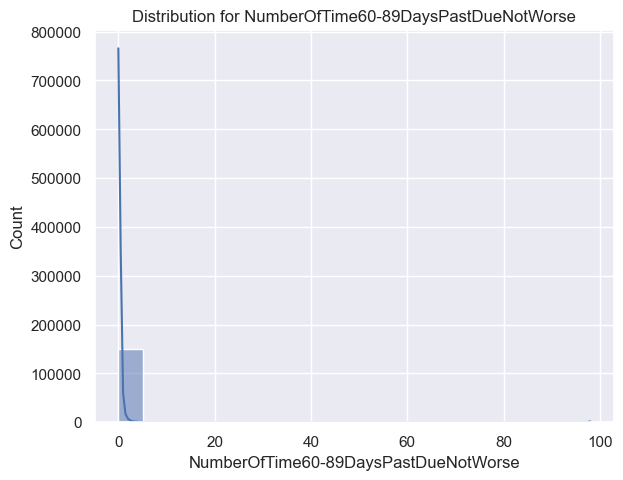

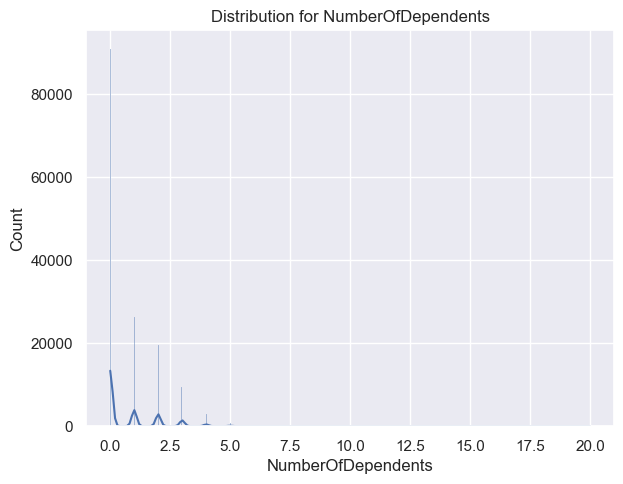

In [17]:
for col in df.columns[1:]:
    sns.histplot(data=df[col],kde=True)
    plt.ticklabel_format(axis='x',style='plain')
    plt.tight_layout()
    plt.title(f'Distribution for {col}')
    plt.show()

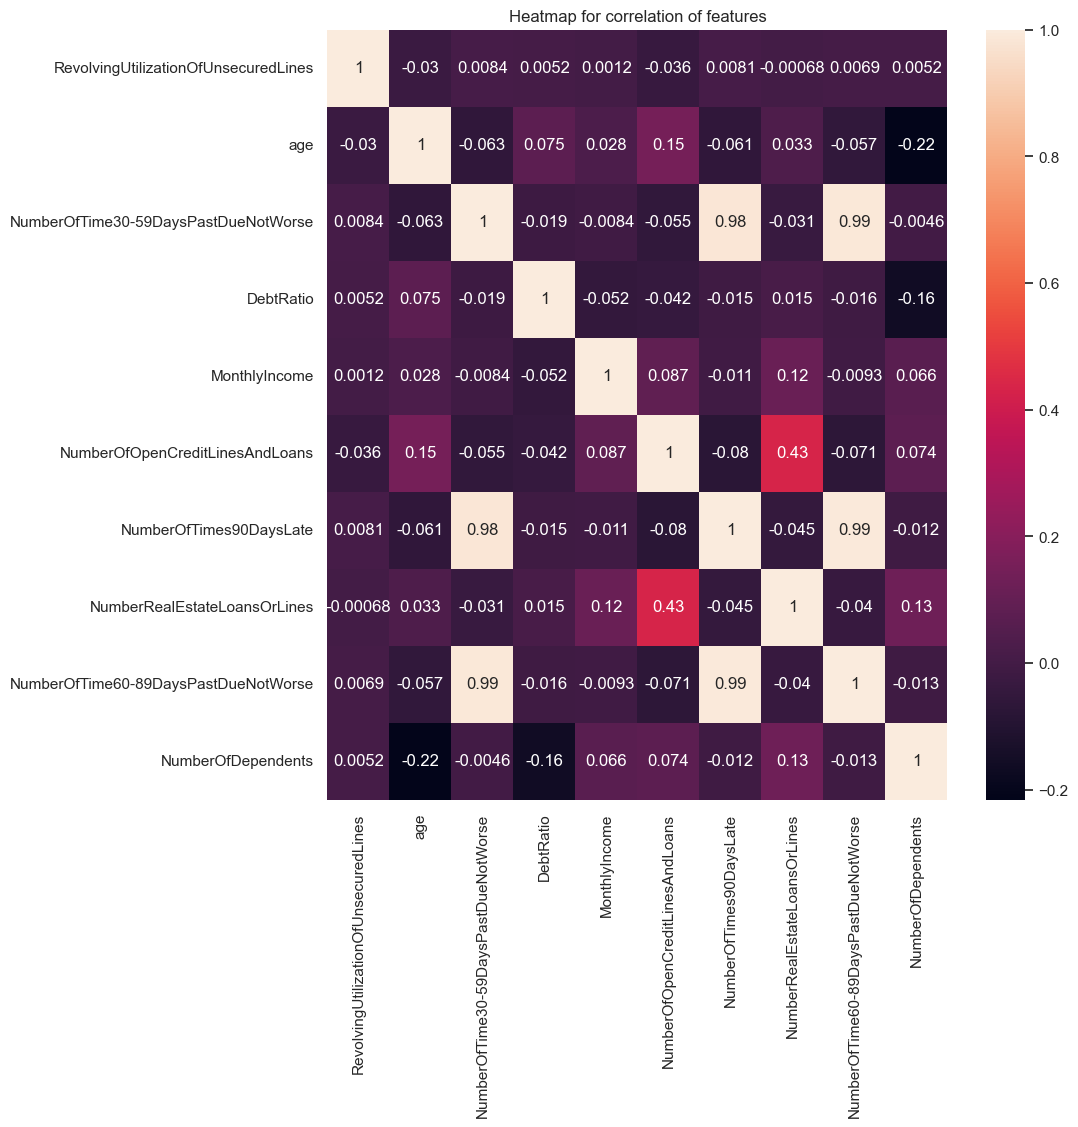

In [18]:
plt.figure(figsize=(10,10))
data = df.iloc[:,1:]
sns.heatmap(data.corr(),annot=True)
plt.title(f'Heatmap for correlation of features')
plt.show()


As observed in the heatmap below, there is a high level of multicollinearity among the independent variables:

    Number of times the borrower has been 90 days or more past due.
    Number of times the borrower has been 60-89 days past due but no worse in the last 2 years.
    Number of times the borrower has been 30-59 days past due but no worse in the last 2 years.

This correlation arises because the customer's delayed payment within the first 30 days automatically falls into the subsequent category of 30-59 days, and so forth."

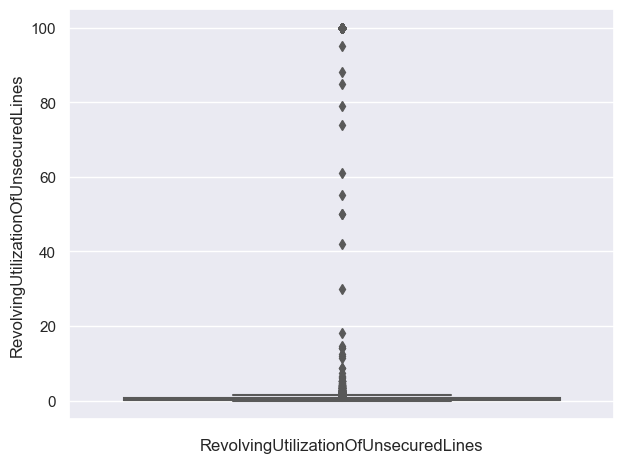

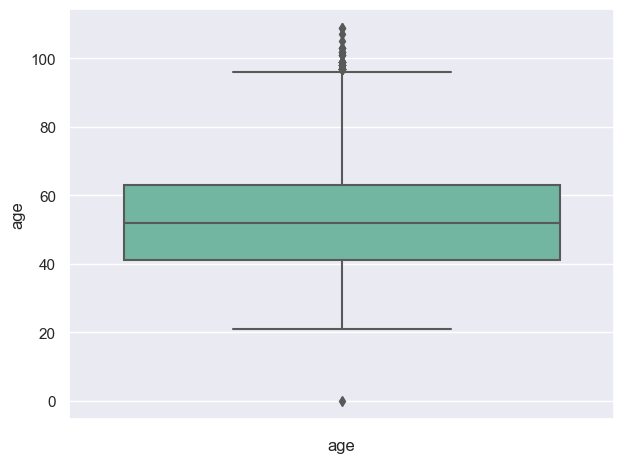

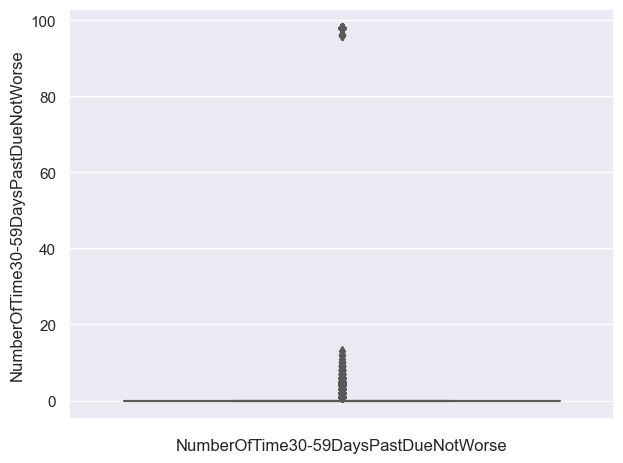

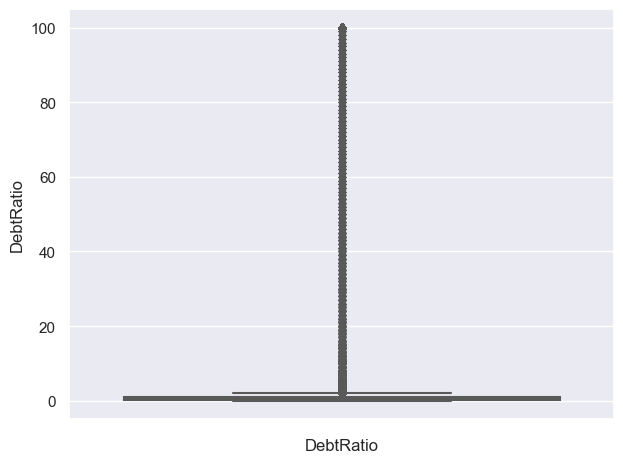

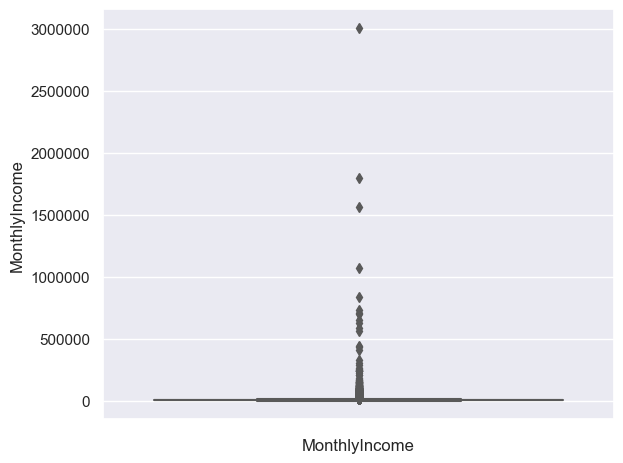

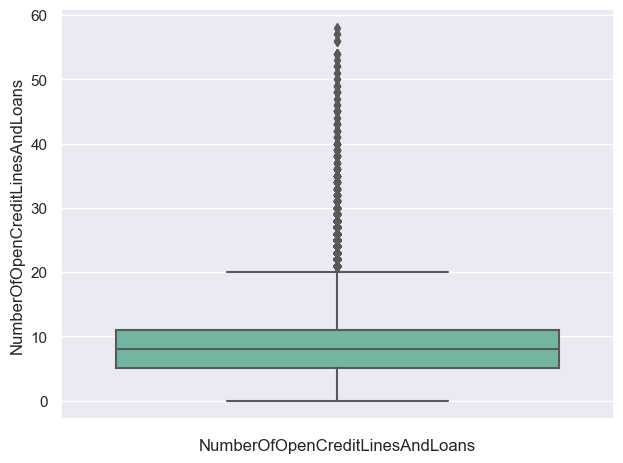

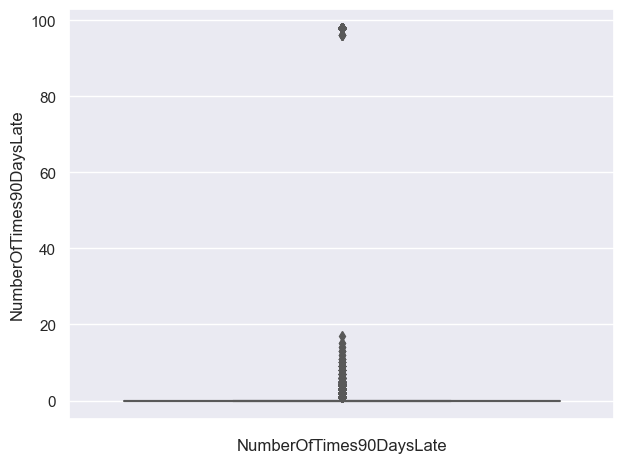

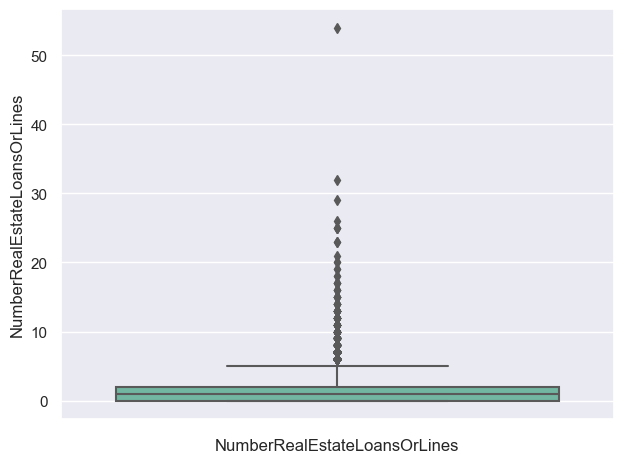

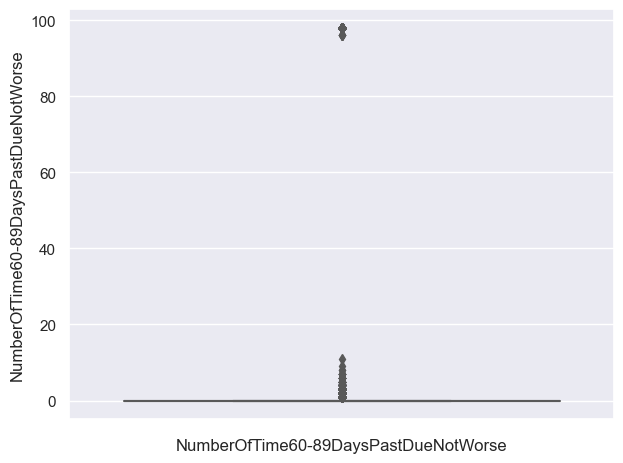

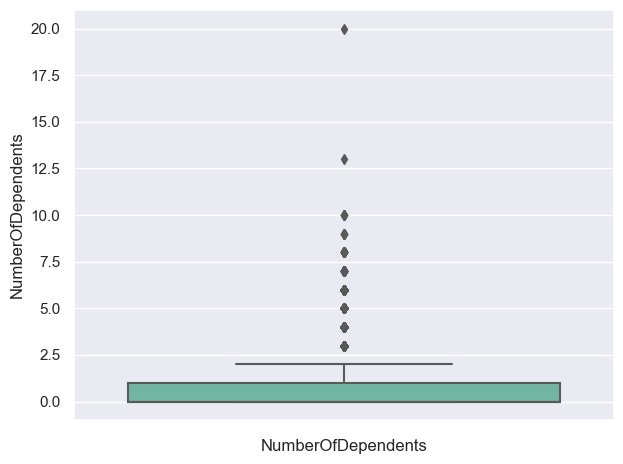

In [19]:
for col in df.columns[1:]:
    sns.boxplot(data=df,y=col,palette='Set2')
    plt.xlabel(f'{col}')
    plt.ticklabel_format(axis='y',style='plain')
    plt.tight_layout()
    plt.show()

In [23]:
# Oversampling
oversampler = SMOTE()
x_resampled, y_resampled = oversampler.fit_resample(X,y)

In [40]:
temp.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,279948.000000,279948.000000,279948.000000,279948.000000,279948.000000,279948.000000,279948.000000,279948.000000,279948.000000,2.799480e+05
mean,-0.000479,0.000490,-0.000112,-0.000386,0.000142,-0.000172,-0.000098,-0.001180,-0.000178,2.946909e-07
std,0.990977,0.999864,0.998614,0.999624,0.990547,0.999702,0.998638,0.999941,0.998592,1.000337e+00
min,-0.191288,-3.483062,-0.136681,-0.461233,-0.593735,-1.555344,-0.113271,-0.768632,-0.100588,-7.624238e-01
25%,-0.160550,-0.712647,-0.136681,-0.455606,-0.248194,-0.770590,-0.113271,-0.768632,-0.100588,-7.624238e-01
50%,-0.045571,-0.073320,-0.136681,-0.450177,-0.060614,-0.182024,-0.113271,0.117297,-0.100588,-6.128630e-01
75%,0.084215,0.708079,-0.016657,-0.438042,0.078421,0.602731,-0.113271,0.117297,-0.100588,5.188536e-01
max,31.001491,4.259893,11.625646,2.304247,296.448641,9.823599,11.646750,47.071527,11.676870,1.782844e+01


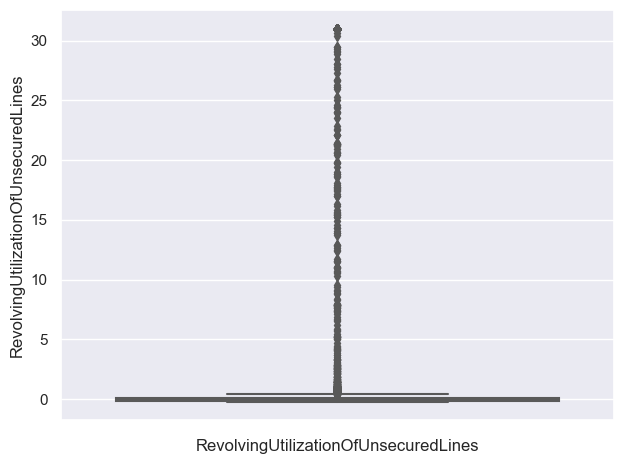

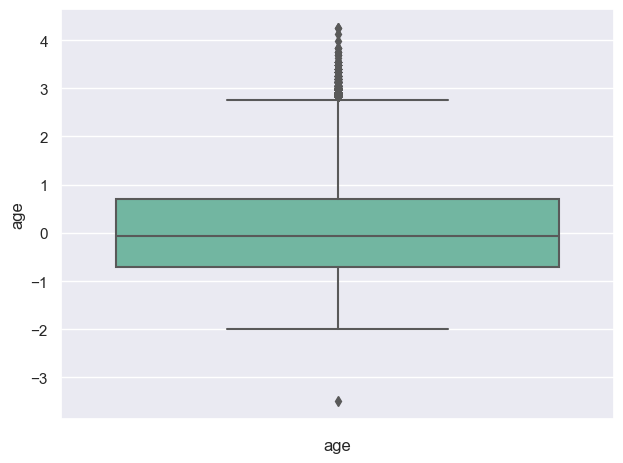

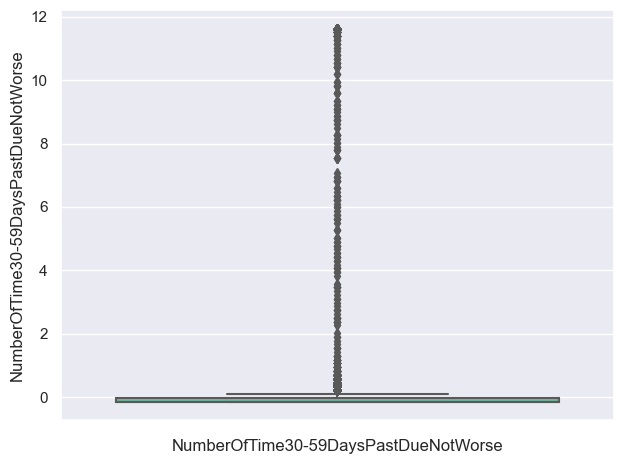

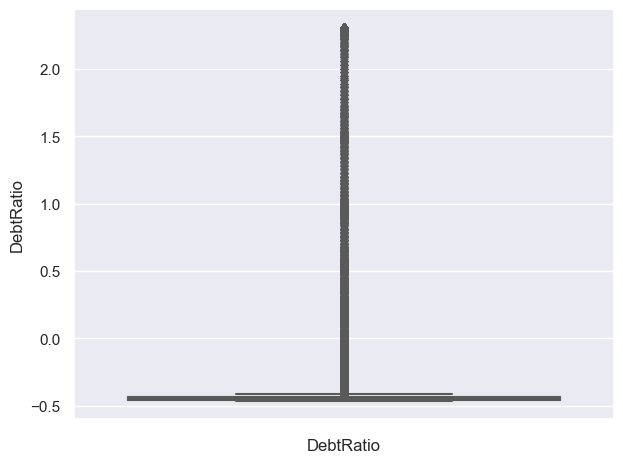

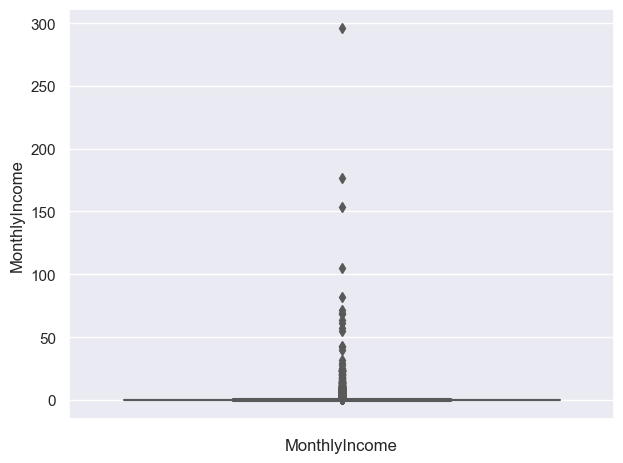

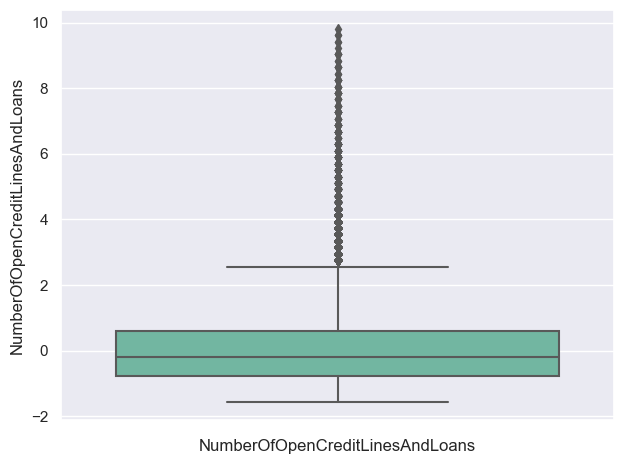

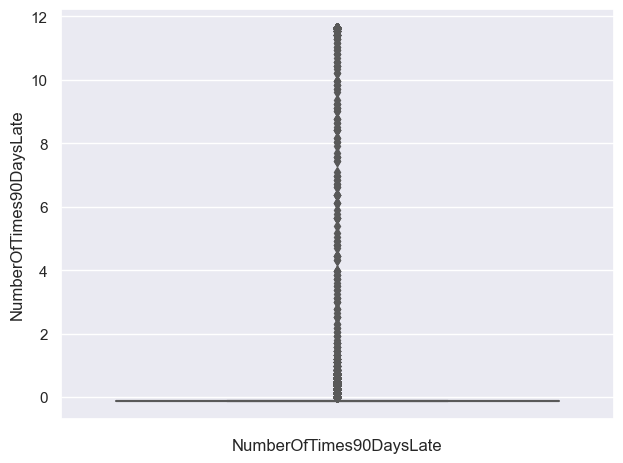

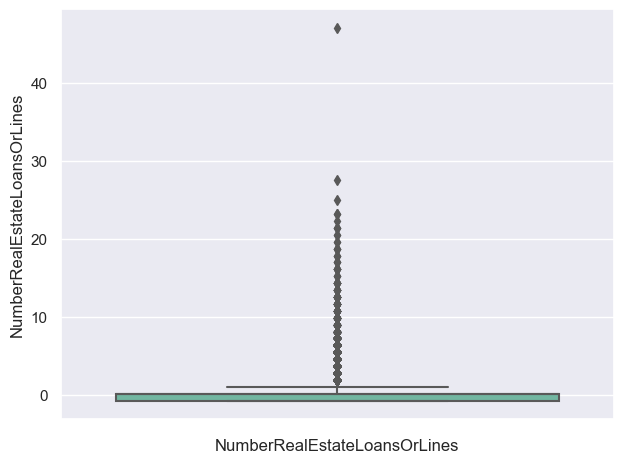

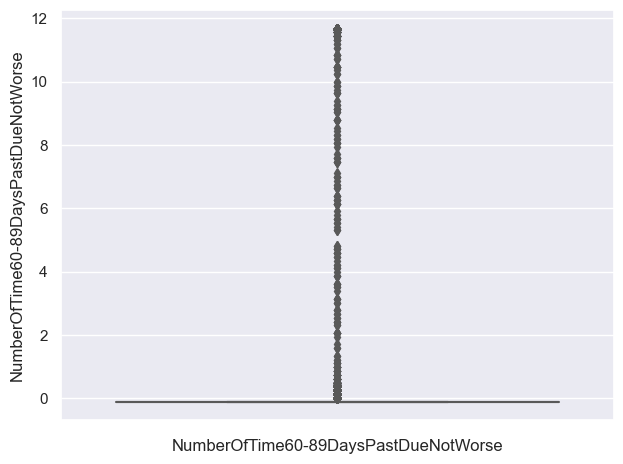

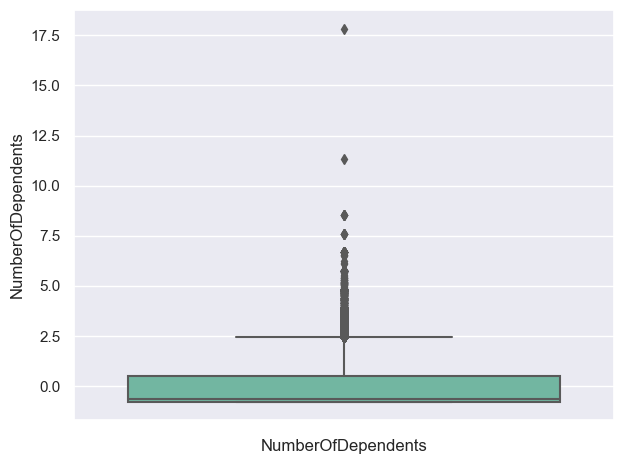

In [39]:
temp = pd.DataFrame(X_train_scaled,columns=X.columns)
temp_1 = pd.DataFrame(X_test_scaled,columns=X.columns)
temp = pd.concat([temp,temp_1],axis=0)
for col in temp.columns:
    sns.boxplot(data=temp,y=col,palette='Set2')
    plt.xlabel(f'{col}')
    plt.ticklabel_format(axis='y',style='plain')
    plt.tight_layout()
    plt.show()

In [24]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,stratify=y_resampled,
                                                    random_state=101,test_size=0.20)

In [25]:
# Doing the scaling on the features for both train and test data seperately to avoid any data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy score for test data: 0.6881407394177532
Accuracy score for train data: 0.6886425133283919
              precision    recall  f1-score   support

           0       0.64      0.87      0.74     27995
           1       0.79      0.51      0.62     27995

    accuracy                           0.69     55990
   macro avg       0.72      0.69      0.68     55990
weighted avg       0.72      0.69      0.68     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

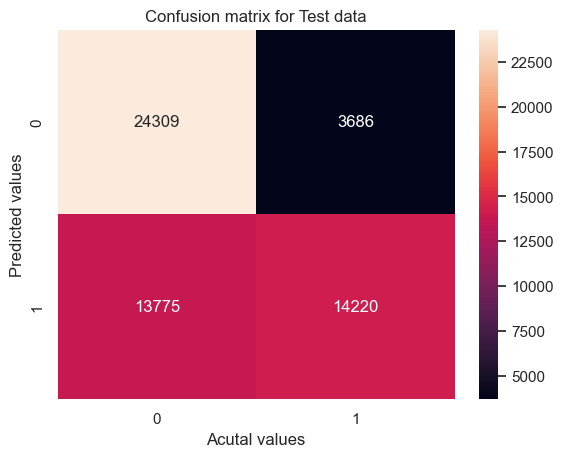

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

Accuracy score for test data: 0.9110734059653509
Accuracy score for train data: 0.9987676260727458
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27995
           1       0.91      0.91      0.91     27995

    accuracy                           0.91     55990
   macro avg       0.91      0.91      0.91     55990
weighted avg       0.91      0.91      0.91     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

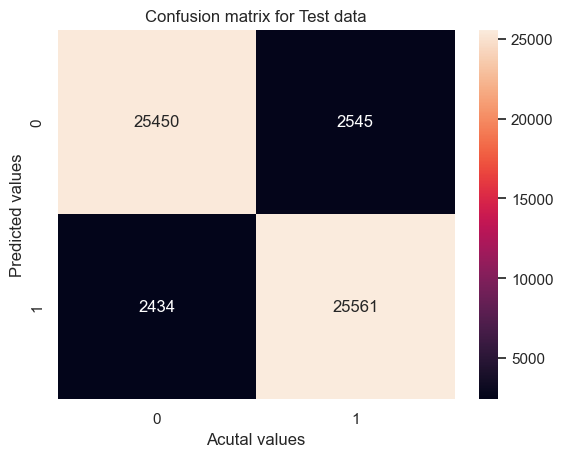

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

Accuracy score for test data: 0.9148955170566172
Accuracy score for train data: 0.9900427758776199
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     27995
           1       0.92      0.91      0.91     27995

    accuracy                           0.91     55990
   macro avg       0.91      0.91      0.91     55990
weighted avg       0.91      0.91      0.91     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

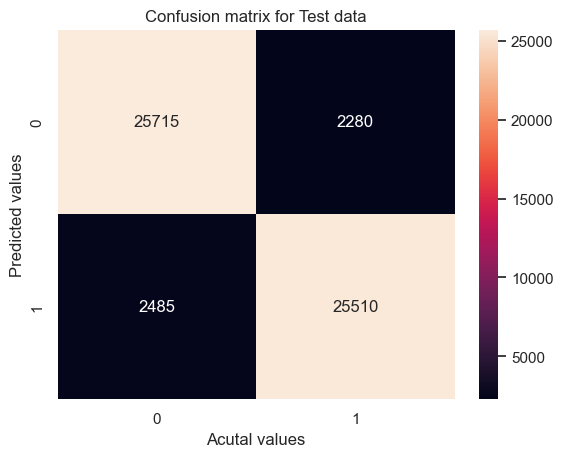

In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(reg_lambda=0.02,max_depth=15)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

Accuracy score for test data: 0.8604036435077692
Accuracy score for train data: 0.902209342823208
              precision    recall  f1-score   support

           0       0.91      0.80      0.85     27995
           1       0.82      0.92      0.87     27995

    accuracy                           0.86     55990
   macro avg       0.87      0.86      0.86     55990
weighted avg       0.87      0.86      0.86     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

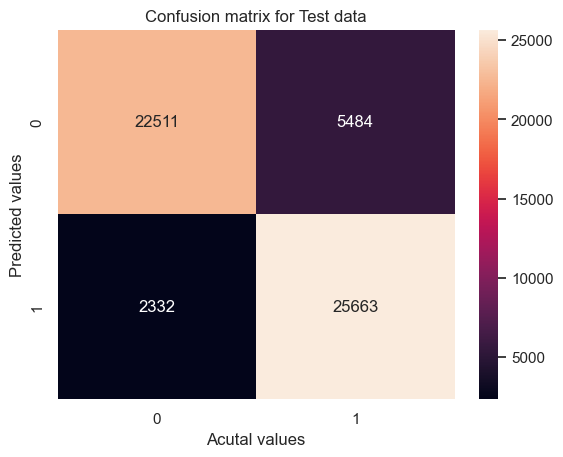

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

### Remove outliers

In [45]:
# Function to remove outliers
def remove_outlier(data,col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR
    return upper_range,lower_range

In [52]:
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,0.0,0.802982,9120.0,13.0,0.0,5.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,0.0,0.085113,3042.0,2.0,0.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,0.0,0.024926,12645.5,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149996,0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149997,0,0.246044,58.0,0.0,1.908024,5400.0,18.0,0.0,1.0,0.0,0.0
149998,0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [46]:
columns = ['']
data = df.copy()
for col in data.columns[1:]:
    upper_range, lower_range = remove_outlier(data,col)
    data[col] = np.where(data[col]>upper_range,upper_range,np.where(data[col]<lower_range,lower_range,data[col]))

In [47]:
# Split the data into dependent and independent variables
X = data.iloc[:,1:]
y = data.iloc[:,0:1]

In [48]:
# Oversampling
oversampler = SMOTE()
x_resampled, y_resampled = oversampler.fit_resample(X,y)

In [49]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,stratify=y_resampled,
                                                    random_state=101,test_size=0.20)

In [50]:
# Doing the scaling on the features for both train and test data seperately to avoid any data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

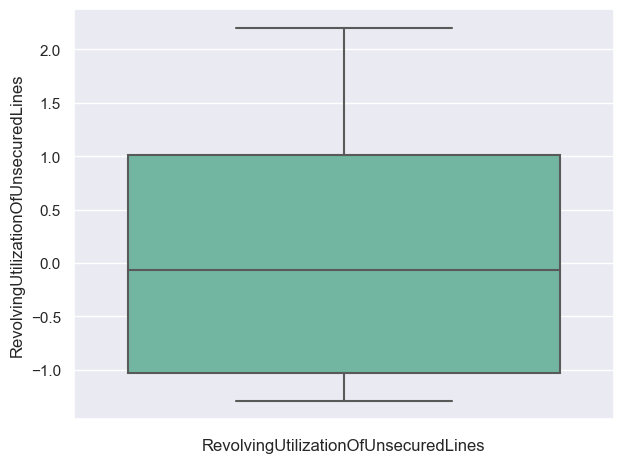

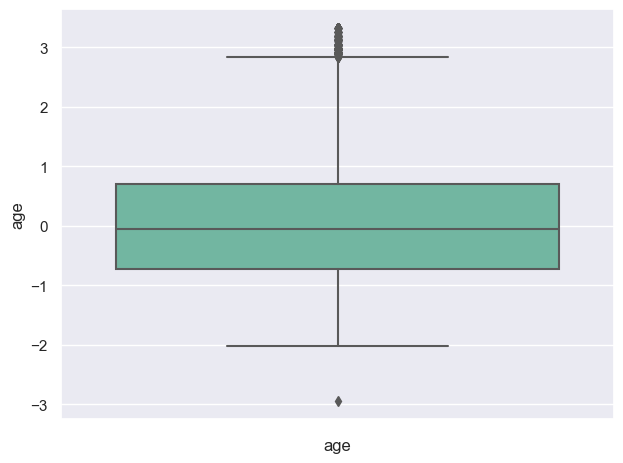

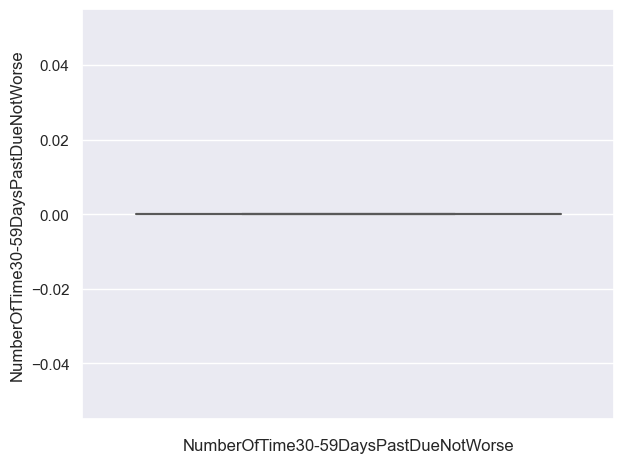

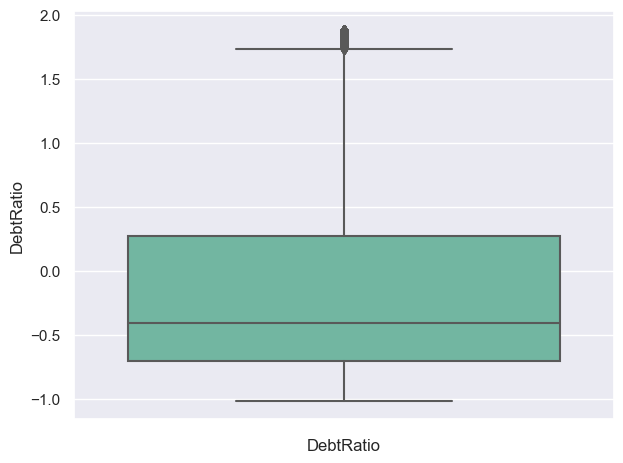

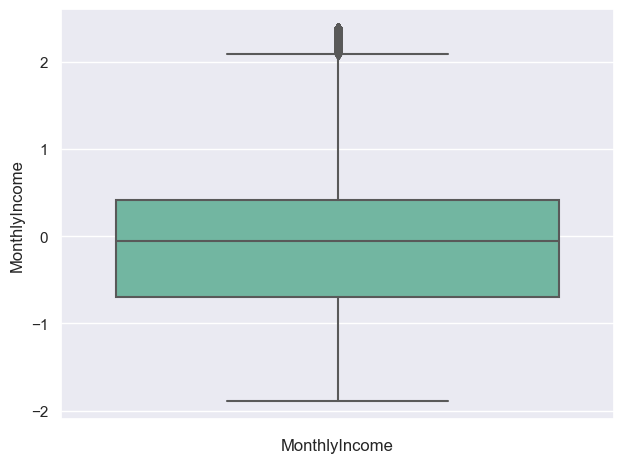

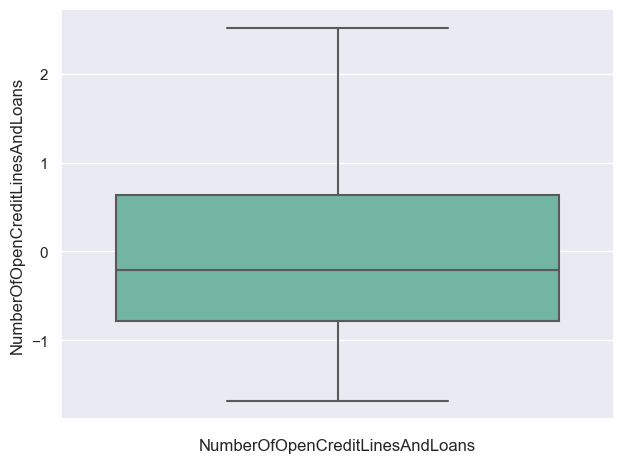

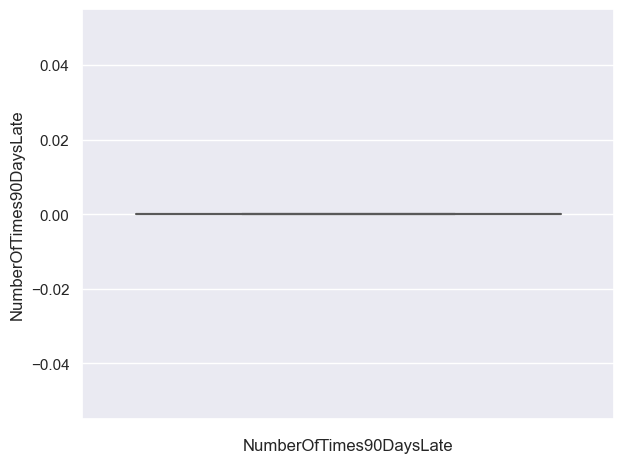

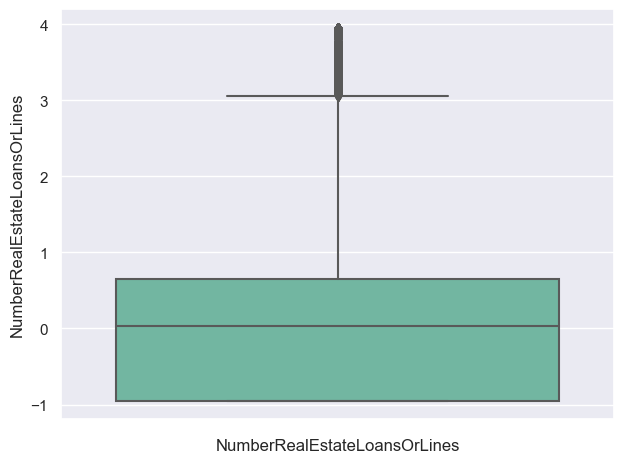

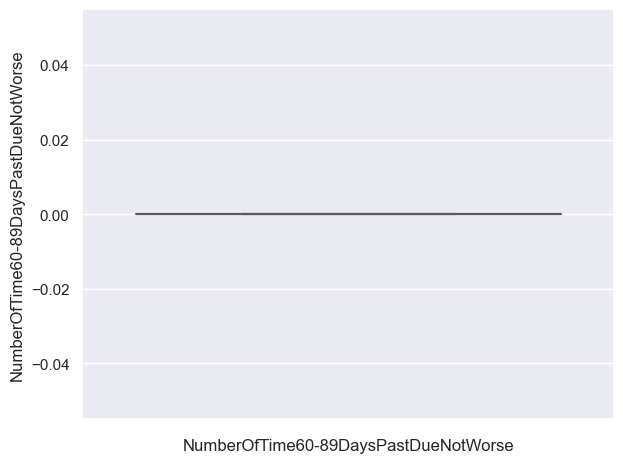

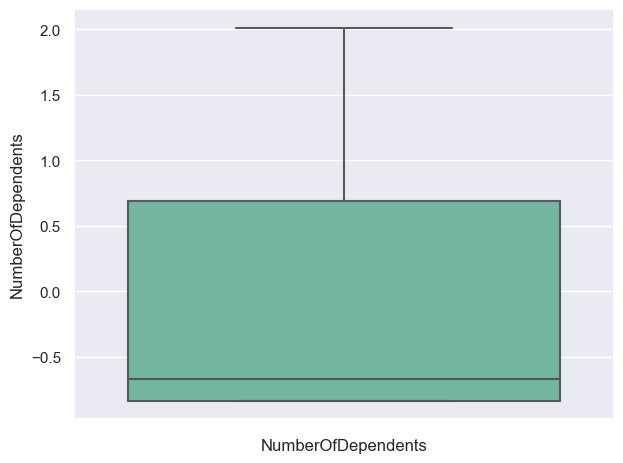

In [51]:
temp = pd.DataFrame(X_train_scaled,columns=X.columns)
temp_1 = pd.DataFrame(X_test_scaled,columns=X.columns)
temp = pd.concat([temp,temp_1],axis=0)
for col in temp.columns:
    sns.boxplot(data=temp,y=col,palette='Set2')
    plt.xlabel(f'{col}')
    plt.ticklabel_format(axis='y',style='plain')
    plt.tight_layout()
    plt.show()

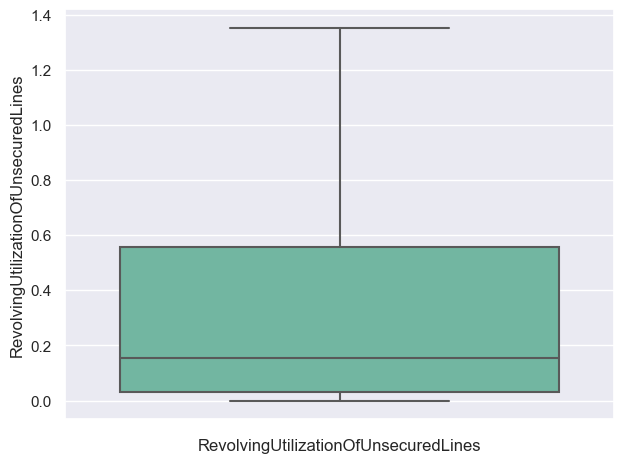

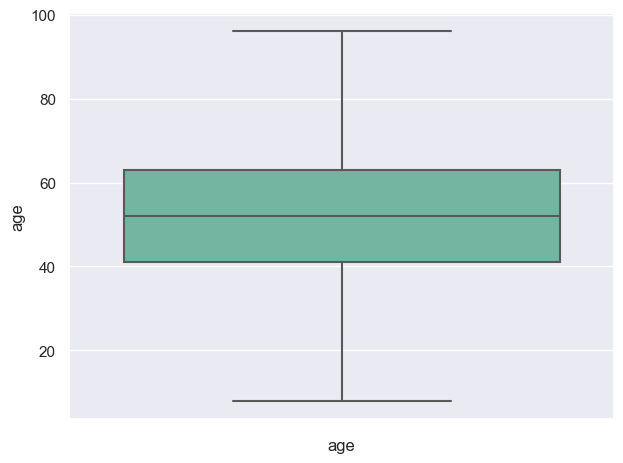

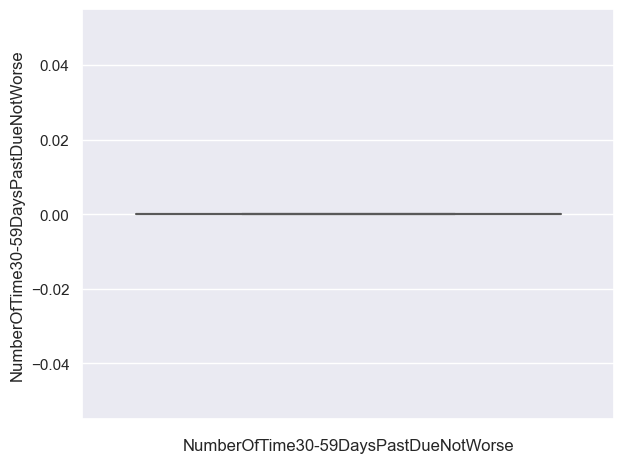

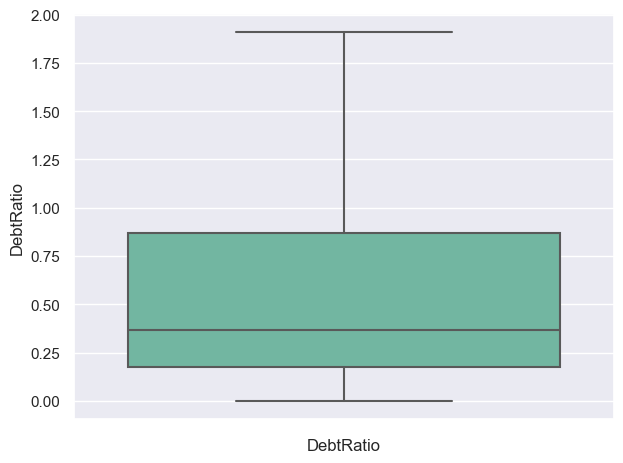

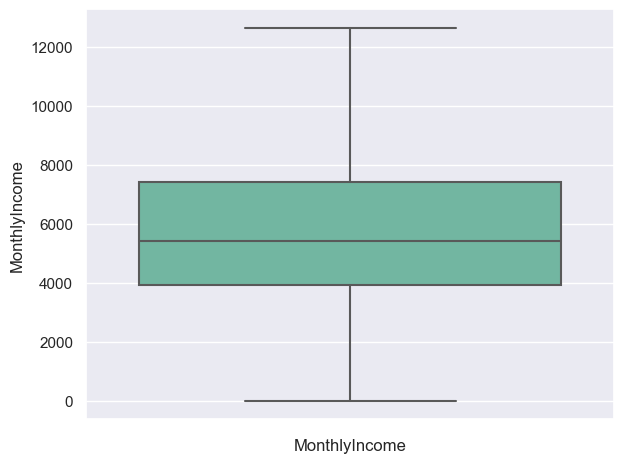

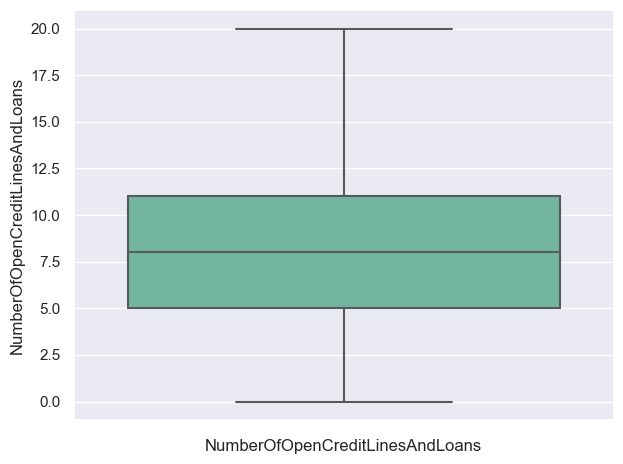

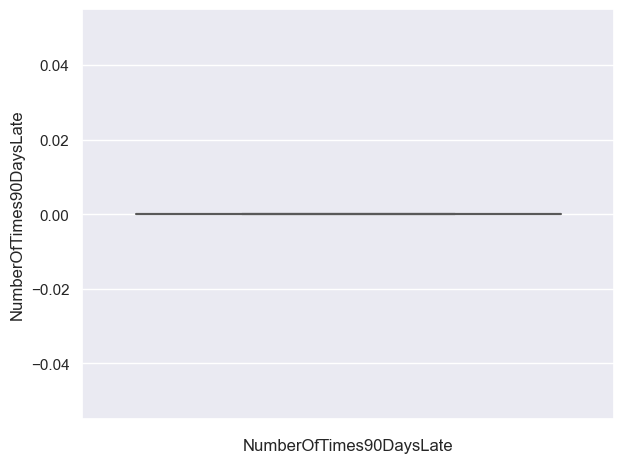

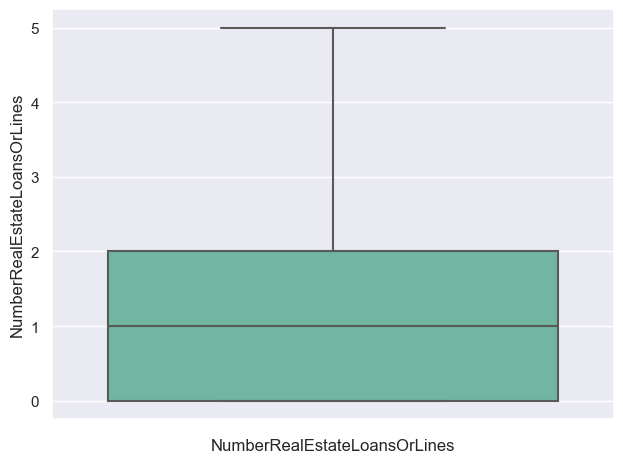

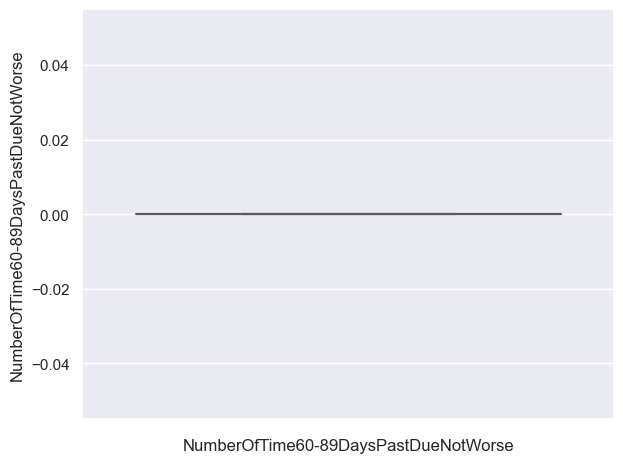

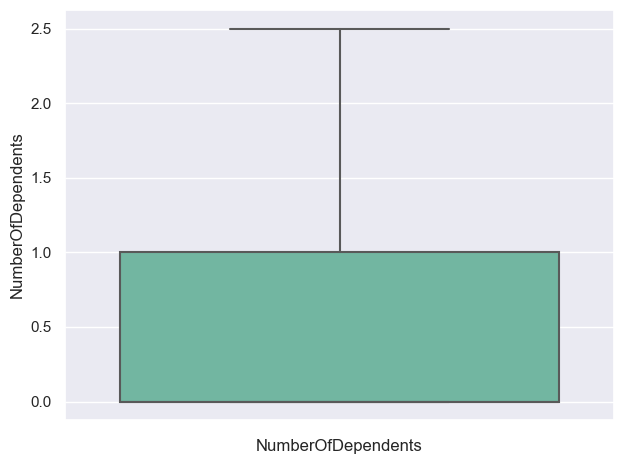

In [53]:
for col in temp.columns:
    sns.boxplot(data=data,y=col,palette='Set2')
    plt.xlabel(f'{col}')
    plt.ticklabel_format(axis='y',style='plain')
    plt.tight_layout()
    plt.show()

Accuracy score for test data: 0.7369351669941061
Accuracy score for train data: 0.7407058466319578
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     27995
           1       0.73      0.75      0.74     27995

    accuracy                           0.74     55990
   macro avg       0.74      0.74      0.74     55990
weighted avg       0.74      0.74      0.74     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

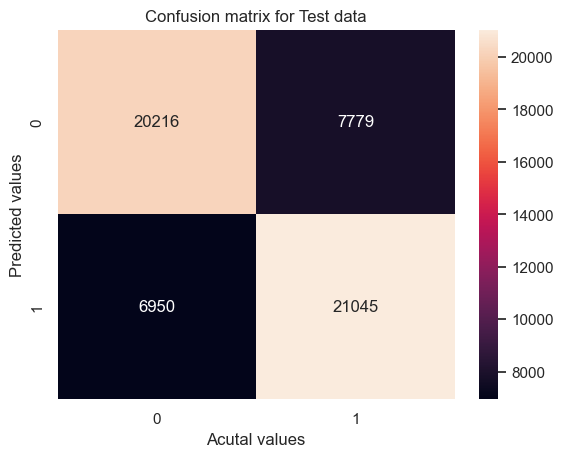

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

Accuracy score for test data: 0.9437935345597428
Accuracy score for train data: 0.9981514391091186
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27995
           1       0.97      0.92      0.94     27995

    accuracy                           0.94     55990
   macro avg       0.94      0.94      0.94     55990
weighted avg       0.94      0.94      0.94     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

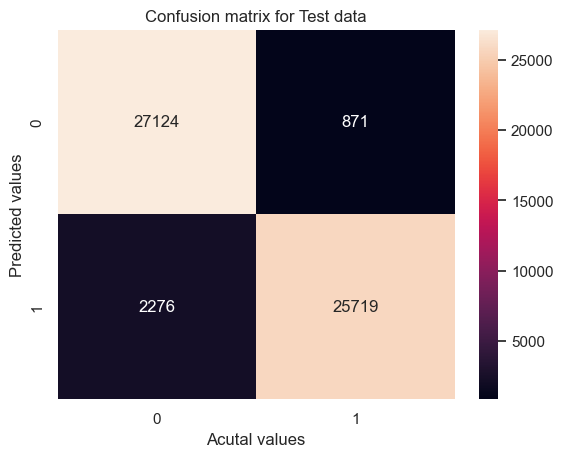

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

Accuracy score for test data: 0.9518306840507234
Accuracy score for train data: 0.9579965886460854
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27995
           1       0.98      0.92      0.95     27995

    accuracy                           0.95     55990
   macro avg       0.95      0.95      0.95     55990
weighted avg       0.95      0.95      0.95     55990



Text(0.5, 1.0, 'Confusion matrix for Test data')

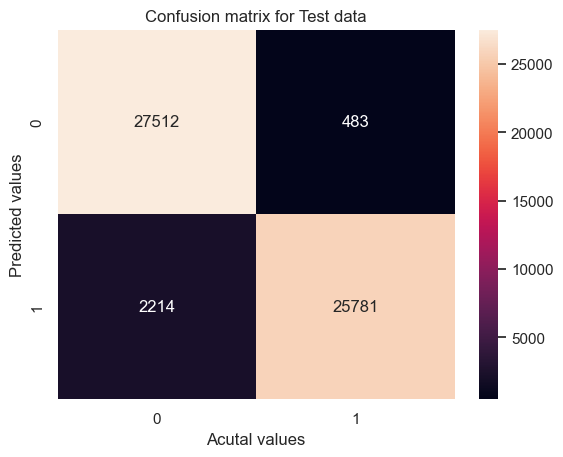

In [58]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy score for test data: {accuracy_score(y_test,y_pred_test)}')
print(f'Accuracy score for train data: {accuracy_score(y_train,y_pred_train)}')
print(classification_report(y_test,y_pred_test))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d')
plt.xlabel('Acutal values')
plt.ylabel('Predicted values')
plt.title('Confusion matrix for Test data')

In [59]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64